<a href="https://colab.research.google.com/github/RifkyFaris/Heart_disease_prediction/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [25]:
#load data
df = pd.read_csv("heart.csv")
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0
135,49,0,0,130,269,0,1,163,0,0.0,2,0,2,1
186,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3,0


In [26]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [27]:
df.isnull().values.any()

np.False_

In [28]:
df.shape

(303, 14)

In [29]:
for col in df:
    print(f'{col}: {df[col].unique()}')

age: [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex: [1 0]
cp: [3 2 1 0]
trestbps: [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol: [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs: [1 0]

In [30]:
cols_to_scale=['age','cp','trestbps','chol','restecg','thalach','oldpeak','slope','ca','thal']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [31]:
for col in df:
    print(f'{col}: {df[col].unique()}')

age: [0.70833333 0.16666667 0.25       0.5625     0.58333333 0.3125
 0.47916667 0.52083333 0.39583333 0.41666667 0.72916667 0.60416667
 0.4375     0.77083333 0.29166667 0.83333333 0.625      0.27083333
 0.66666667 0.22916667 0.875      0.45833333 0.75       0.5
 0.35416667 0.33333333 0.20833333 0.375      0.6875     0.10416667
 0.125      0.         0.54166667 0.64583333 0.79166667 0.8125
 0.9375     0.97916667 0.85416667 0.1875     1.        ]
sex: [1 0]
cp: [1.         0.66666667 0.33333333 0.        ]
trestbps: [0.48113208 0.33962264 0.24528302 0.43396226 0.73584906 0.52830189
 0.1509434  0.38679245 0.62264151 0.10377358 0.29245283 0.45283019
 0.5754717  0.09433962 0.41509434 0.32075472 0.13207547 0.37735849
 0.26415094 0.19811321 0.22641509 0.05660377 0.28301887 0.
 0.16981132 0.0754717  0.54716981 0.06603774 0.35849057 0.50943396
 0.79245283 0.33018868 0.81132075 0.39622642 0.30188679 0.11320755
 0.58490566 0.71698113 0.49056604 0.21698113 1.         0.66981132
 0.75471698 0.92452

In [32]:
#Train test split
X=df.drop('target',axis='columns')
y=df['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [33]:
X_train.shape

(242, 13)

In [34]:
X_test.shape

(61, 13)

In [35]:
len(X_train.columns)

13

In [36]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(13, input_shape=(13,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.4432 - loss: 0.7190
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5916 - loss: 0.7008  
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5549 - loss: 0.6904 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5742 - loss: 0.6788 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5555 - loss: 0.6681 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5096 - loss: 0.6719  
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5463 - loss: 0.6625 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5665 - loss: 0.6541 
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6417 - loss: 0.6381 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6551 - loss: 0.6539 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7148 - loss: 0.6276 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7054 - loss: 0.6239 

In [37]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.8922 - loss: 0.3138


[0.32140249013900757, 0.8852459192276001]

In [38]:
yp = model.predict(X_test)
yp[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


array([[0.8806784 ],
       [0.03409034],
       [0.01628003],
       [0.25353256],
       [0.9061118 ]], dtype=float32)

In [39]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [40]:
y_pred[:10]

[1, 0, 0, 0, 1, 0, 1, 0, 1, 1]

In [41]:
y_test[:10]

,target
302,0
243,0
268,0
213,0
24,1
284,0
159,1
295,0
50,1
163,1


In [42]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        30
           1       0.88      0.90      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.89        61
weighted avg       0.89      0.89      0.89        61



Text(95.72222222222221, 0.5, 'Actual')

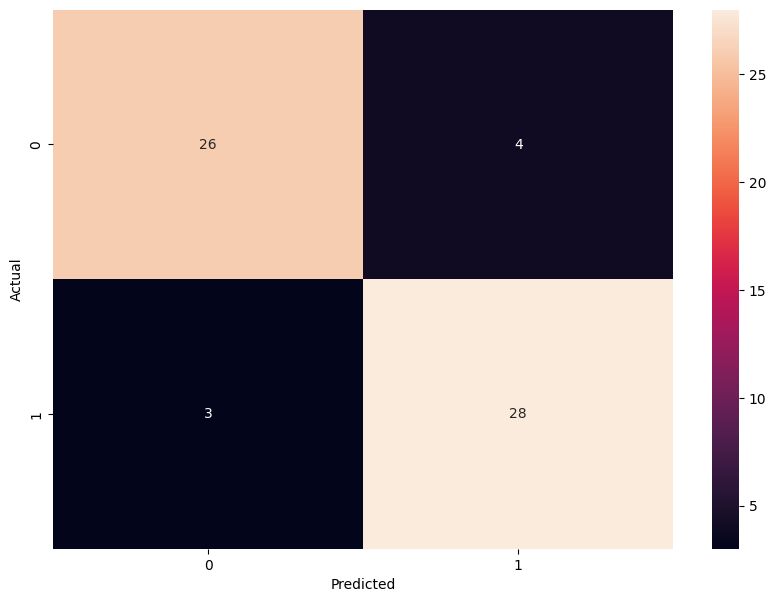

In [43]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')